# Project: Milestone 5
**Name:** Eula Fullerton  
**Due Date:** Nov 17, 2024  
**Class:** DSC540-T302 Data Preparation  
**Professor:** Professor Williams  

# Import Libraries

In [46]:
import pandas as pd
import sqlite3
import re

# Load your Datasets 

In [49]:
import pandas as pd

# Function to rename columns to be SQLite-friendly (replace spaces and hyphens with underscores)
def rename_columns(df):
    df.columns = df.columns.str.replace(' ', '_').str.replace('-', '_').str.lower()  # Convert column names to lowercase
    return df

# Function to convert all values in the DataFrame to lowercase
def lowercase_all_values(df):
    return df.applymap(lambda x: str(x).lower() if isinstance(x, str) else x)

# Function to modify values in 'condition' column in df4 (Table 4):
# Convert all values to lowercase, remove hyphens, and replace spaces with underscores
def modify_condition_column(df):
    df['condition'] = df['condition'].str.replace('-', '_').str.replace(' ', '_').str.lower()
    return df

# Function to print unique values of each column in the DataFrame
def print_unique_values(df):
    for column in df.columns:
        print(f"Unique values in column '{column}': {df[column].unique()}")

# Load datasets into Pandas DataFrames
df1 = pd.read_csv("df_total_cleaned.csv") 
df2 = pd.read_csv("table_0_final.csv")
df3 = pd.read_csv("final_pregnancy_drug_data.csv")
df4 = pd.read_csv("pregnancy_conditions_common_drugs.csv")

# Rename columns to be SQLite-friendly (lowercase column names) and lowercase all values
df1 = rename_columns(df1)
df2 = rename_columns(df2)
df3 = rename_columns(df3)
df4 = rename_columns(df4)

# Convert all values to lowercase in the DataFrames
df1 = lowercase_all_values(df1)
df2 = lowercase_all_values(df2)
df3 = lowercase_all_values(df3)
df4 = lowercase_all_values(df4)

# Modify 'condition' column in df4 (Table 4)
df4 = modify_condition_column(df4)

# Print the unique values for each DataFrame
print("Unique values in df1:")
print_unique_values(df1)
print("\nUnique values in df2:")
print_unique_values(df2)
print("\nUnique values in df3:")
print_unique_values(df3)
print("\nUnique values in df4:")
print_unique_values(df4)

Unique values in df1:
Unique values in column 'notes': ['total']
Unique values in column 'census_region': ['census region 2: midwest' 'census region 3: south'
 'census region 4: west' 'census region 1: northeast']
Unique values in column 'census_region_code': ['cens-r2' 'cens-r3' 'cens-r4' 'cens-r1']
Unique values in column 'chlamydia': ['yes' 'unknown']
Unique values in column 'cause_of_death': ['unknown']
Unique values in column 'deaths': [143. 256.  71.  18.  46.  25. 129. 273. 462. 253. 228. 488. 924. 356.
  16.  47.  74.  12.  27.  52.  21.  60. 103. 223.  86. 132. 267. 482.
 162. 501. 807. 263.  14.  20.  64.  33. 220. 540. 696. 171.]
Unique values in column 'births': [ 14093.  30595.  10300.   2029.   3280.   3151.  50851.  64914. 105341.
  75345.  50171.  81230. 141878.  75141.   1025.   2740.   5689.   1494.
   1764.   3100.   4031.   6309.   2063.   6580.   9438.  17906.   8879.
  18064.  24997.  46520.  17191.  24231.  37587.  55358.  25205.   1053.
   1928.   4898.   2353. 

C:\Users\samue\AppData\Local\Temp\ipykernel_57432\4167467443.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df.applymap(lambda x: str(x).lower() if isinstance(x, str) else x)


# Create SQLite Database

In [52]:
# Connect to (or create) an SQLite database
conn = sqlite3.connect("pregnancy_database.db")
cursor = conn.cursor()

In [54]:
# Save the DataFrames as individual tables in the SQLite database
df1.to_sql("table1", conn, if_exists="replace", index=False)
df2.to_sql("table2", conn, if_exists="replace", index=False)
df3.to_sql("table3", conn, if_exists="replace", index=False)
df4.to_sql("table4", conn, if_exists="replace", index=False)

print("Datasets successfully loaded into SQLite.")

Datasets successfully loaded into SQLite.


In [60]:
# List all tables in the database
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
print("Tables in the database:")
print(tables)

Tables in the database:
     name
0  table1
1  table2
2  table3
3  table4


## Inspect Data in SQLite

In [63]:
# Query to get all table names in the database
tables_query = "SELECT name FROM sqlite_master WHERE type='table';"
tables_df = pd.read_sql_query(tables_query, conn)

# Loop through each table and display the first 10 rows
for table_name in tables_df['name']:
    print(f"Inspecting table: {table_name}")
    
    # Query to select all data from the current table (limit to first 10 rows)
    query = f"SELECT * FROM {table_name} LIMIT 10;"
    df_table = pd.read_sql_query(query, conn)
    
    # Display the first few rows of the current table
    print(df_table.head())
    print("\n" + "-"*50 + "\n")

Inspecting table: table1
   notes             census_region census_region_code chlamydia  \
0  total  census region 2: midwest            cens-r2       yes   
1  total    census region 3: south            cens-r3       yes   
2  total     census region 4: west            cens-r4       yes   
3  total  census region 2: midwest            cens-r2   unknown   
4  total    census region 3: south            cens-r3   unknown   

  cause_of_death  deaths   births         death_rate eclampsia  \
0        unknown   143.0  14093.0              10.15   unknown   
1        unknown   256.0  30595.0               8.37   unknown   
2        unknown    71.0  10300.0               6.89   unknown   
3        unknown    18.0   2029.0  8.87 (unreliable)       yes   
4        unknown    46.0   3280.0              14.02       yes   

  gestational_diabetes gestational_hypertension gonorrhea hepatitis_b  \
0              unknown                  unknown   unknown     unknown   
1              unknown       

In [65]:
# Query to get the number of rows in table1
count_query = "SELECT COUNT(*) FROM table1"
row_count = pd.read_sql_query(count_query, conn)
print(f"Number of rows in table1: {row_count.iloc[0, 0]}")

Number of rows in table1: 43


## Joining Table 1 and Table 4
join table 1 by satisfying yes to certain conditions found in table 4. 

### Inspect Table1

In [69]:
# Get the columns from table1
columns = ['notes', 'census_region', 'census_region_code', 'chlamydia', 'cause_of_death', 'deaths', 
           'births', 'death_rate', 'eclampsia', 'gestational_diabetes', 'gestational_hypertension', 
           'gonorrhea', 'hepatitis_b', 'hepatitis_c', 'pre_pregnancy_diabetes', 'pre_pregnancy_hypertension', 
           'previous_preterm_birth', 'syphilis', 'tobacco_use']

# Loop through each column and print unique values
for column in columns:
    query = f"SELECT DISTINCT {column} FROM table1"
    unique_values = pd.read_sql_query(query, conn)  # Execute the query and get the result as a DataFrame
    print(f"Unique values in column '{column}':")
    print(unique_values[column].to_list())  # Print the unique values for the column
    print("\n")

Unique values in column 'notes':
['total']


Unique values in column 'census_region':
['census region 2: midwest', 'census region 3: south', 'census region 4: west', 'census region 1: northeast']


Unique values in column 'census_region_code':
['cens-r2', 'cens-r3', 'cens-r4', 'cens-r1']


Unique values in column 'chlamydia':
['yes', 'unknown']


Unique values in column 'cause_of_death':
['unknown']


Unique values in column 'deaths':
[143.0, 256.0, 71.0, 18.0, 46.0, 25.0, 129.0, 273.0, 462.0, 253.0, 228.0, 488.0, 924.0, 356.0, 16.0, 47.0, 74.0, 12.0, 27.0, 52.0, 21.0, 60.0, 103.0, 223.0, 86.0, 132.0, 267.0, 482.0, 162.0, 501.0, 807.0, 263.0, 14.0, 20.0, 64.0, 33.0, 220.0, 540.0, 696.0, 171.0]


Unique values in column 'births':
[14093.0, 30595.0, 10300.0, 2029.0, 3280.0, 3151.0, 50851.0, 64914.0, 105341.0, 75345.0, 50171.0, 81230.0, 141878.0, 75141.0, 1025.0, 2740.0, 5689.0, 1494.0, 1764.0, 3100.0, 4031.0, 6309.0, 2063.0, 6580.0, 9438.0, 17906.0, 8879.0, 18064.0, 24997.0, 46520.0, 171

### Check Table 4

In [72]:
# SQL query to fetch unique values from the 'condition' column of table4
query_table4_unique = "SELECT DISTINCT condition FROM table4;"

# Execute the query and load the results into a pandas DataFrame
df_table4_unique = pd.read_sql_query(query_table4_unique, conn)

# Display the unique rows in the 'condition' column of table4
df_table4_unique

,condition
0,pre_pregnancy_diabetes
1,gestational_diabetes
2,pre_pregnancy_hypertension
3,gestational_hypertension
4,eclampsia
5,previous_preterm_birth
6,gonorrhea
7,syphilis
8,chlamydia
9,hepatitis_b


In [74]:
# Define the SQL query to count the 'yes' values in each column of interest
query = """
SELECT
    SUM(CASE WHEN LOWER(chlamydia) = 'yes' THEN 1 ELSE 0 END) AS chlamydia_yes,
    SUM(CASE WHEN LOWER(eclampsia) = 'yes' THEN 1 ELSE 0 END) AS eclampsia_yes,
    SUM(CASE WHEN LOWER(gestational_diabetes) = 'yes' THEN 1 ELSE 0 END) AS gestational_diabetes_yes,
    SUM(CASE WHEN LOWER(gestational_hypertension) = 'yes' THEN 1 ELSE 0 END) AS gestational_hypertension_yes,
    SUM(CASE WHEN LOWER(gonorrhea) = 'yes' THEN 1 ELSE 0 END) AS gonorrhea_yes,
    SUM(CASE WHEN LOWER(hepatitis_b) = 'yes' THEN 1 ELSE 0 END) AS hepatitis_b_yes,
    SUM(CASE WHEN LOWER(hepatitis_c) = 'yes' THEN 1 ELSE 0 END) AS hepatitis_c_yes,
    SUM(CASE WHEN LOWER(pre_pregnancy_diabetes) = 'yes' THEN 1 ELSE 0 END) AS pre_pregnancy_diabetes_yes,
    SUM(CASE WHEN LOWER(pre_pregnancy_hypertension) = 'yes' THEN 1 ELSE 0 END) AS pre_pregnancy_hypertension_yes,
    SUM(CASE WHEN LOWER(previous_preterm_birth) = 'yes' THEN 1 ELSE 0 END) AS previous_preterm_birth_yes,
    SUM(CASE WHEN LOWER(syphilis) = 'yes' THEN 1 ELSE 0 END) AS syphilis_yes,
    SUM(CASE WHEN LOWER(tobacco_use) = 'yes' THEN 1 ELSE 0 END) AS tobacco_use_yes
FROM table1;
"""

# Execute the SQL query and load the result into a pandas DataFrame
yes_counts = pd.read_sql_query(query, conn)

# Display the result
print("Total 'yes' values in each column:")
print(yes_counts)

Total 'yes' values in each column:
   chlamydia_yes  eclampsia_yes  gestational_diabetes_yes  \
0              3              3                         4   

   gestational_hypertension_yes  gonorrhea_yes  hepatitis_b_yes  \
0                             4              4                1   

   hepatitis_c_yes  pre_pregnancy_diabetes_yes  \
0                4                           4   

   pre_pregnancy_hypertension_yes  previous_preterm_birth_yes  syphilis_yes  \
0                               4                           4             4   

   tobacco_use_yes  
0                4  


In [76]:
# Query to get column names from table1
query_table1 = "PRAGMA table_info(table1);"
columns_table1 = pd.read_sql_query(query_table1, conn)

# Query to get column names from table4
query_table4 = "PRAGMA table_info(table4);"
columns_table4 = pd.read_sql_query(query_table4, conn)

# Display the column names
print("Columns in table1:")
print(columns_table1['name'].tolist())  # 'name' contains column names in the result

print("\nColumns in table4:")
print(columns_table4['name'].tolist())  # 'name' contains column names in the result

Columns in table1:
['notes', 'census_region', 'census_region_code', 'chlamydia', 'cause_of_death', 'deaths', 'births', 'death_rate', 'eclampsia', 'gestational_diabetes', 'gestational_hypertension', 'gonorrhea', 'hepatitis_b', 'hepatitis_c', 'pre_pregnancy_diabetes', 'pre_pregnancy_hypertension', 'previous_preterm_birth', 'syphilis', 'tobacco_use']

Columns in table4:
['condition', 'number_one_drug_used', 'fda_pregnancy_risk_category']


In [78]:
# Check the data types of columns in table1
query_table1 = "PRAGMA table_info(table1);"
table1_info = pd.read_sql_query(query_table1, conn)
print("Columns and data types for table1:")
print(table1_info)

# Check the data types of columns in table4
query_table4 = "PRAGMA table_info(table4);"
table4_info = pd.read_sql_query(query_table4, conn)
print("\nColumns and data types for table4:")
print(table4_info)

Columns and data types for table1:
    cid                        name  type  notnull dflt_value  pk
0     0                       notes  TEXT        0       None   0
1     1               census_region  TEXT        0       None   0
2     2          census_region_code  TEXT        0       None   0
3     3                   chlamydia  TEXT        0       None   0
4     4              cause_of_death  TEXT        0       None   0
5     5                      deaths  REAL        0       None   0
6     6                      births  REAL        0       None   0
7     7                  death_rate  TEXT        0       None   0
8     8                   eclampsia  TEXT        0       None   0
9     9        gestational_diabetes  TEXT        0       None   0
10   10    gestational_hypertension  TEXT        0       None   0
11   11                   gonorrhea  TEXT        0       None   0
12   12                 hepatitis_b  TEXT        0       None   0
13   13                 hepatitis_c  TEXT

In [80]:
# Create result_table with the same data types as table1 and table4
create_table_query = """
CREATE TABLE IF NOT EXISTS result_table (
    notes TEXT,
    census_region TEXT,
    census_region_code TEXT,
    chlamydia TEXT,
    cause_of_death TEXT,
    deaths REAL,
    births REAL,
    death_rate TEXT,
    eclampsia TEXT,
    gestational_diabetes TEXT,
    gestational_hypertension TEXT,
    gonorrhea TEXT,
    hepatitis_b TEXT,
    hepatitis_c TEXT,
    pre_pregnancy_diabetes TEXT,
    pre_pregnancy_hypertension TEXT,
    previous_preterm_birth TEXT,
    syphilis TEXT,
    tobacco_use TEXT,
    condition TEXT,
    number_one_drug_used TEXT,
    fda_pregnancy_risk_category TEXT
);
"""

# Execute the query to create the table
conn.execute(create_table_query)

In [84]:
# SQL query to perform the join and insert into result_table
query = """
INSERT INTO result_table
SELECT t1.notes, t1.census_region, t1.census_region_code, t1.chlamydia, t1.cause_of_death,
       t1.deaths, t1.births, t1.death_rate, t1.eclampsia, t1.gestational_diabetes, 
       t1.gestational_hypertension, t1.gonorrhea, t1.hepatitis_b, t1.hepatitis_c,
       t1.pre_pregnancy_diabetes, t1.pre_pregnancy_hypertension, t1.previous_preterm_birth,
       t1.syphilis, t1.tobacco_use, t4.condition, t4.number_one_drug_used, t4.fda_pregnancy_risk_category
FROM table1 AS t1
JOIN table4 AS t4
    ON (LOWER(t1.chlamydia) = 'yes' AND LOWER(t4.condition) = 'chlamydia')
    OR (LOWER(t1.eclampsia) = 'yes' AND LOWER(t4.condition) = 'eclampsia')
    OR (LOWER(t1.gestational_diabetes) = 'yes' AND LOWER(t4.condition) = 'gestational_diabetes')
    OR (LOWER(t1.gestational_hypertension) = 'yes' AND LOWER(t4.condition) = 'gestational_hypertension')
    OR (LOWER(t1.gonorrhea) = 'yes' AND LOWER(t4.condition) = 'gonorrhea')
    OR (LOWER(t1.hepatitis_b) = 'yes' AND LOWER(t4.condition) = 'hepatitis_b')
    OR (LOWER(t1.hepatitis_c) = 'yes' AND LOWER(t4.condition) = 'hepatitis_c')
    OR (LOWER(t1.pre_pregnancy_diabetes) = 'yes' AND LOWER(t4.condition) = 'pre_pregnancy_diabetes')
    OR (LOWER(t1.pre_pregnancy_hypertension) = 'yes' AND LOWER(t4.condition) = 'pre_pregnancy_hypertension')
    OR (LOWER(t1.previous_preterm_birth) = 'yes' AND LOWER(t4.condition) = 'previous_preterm_birth')
    OR (LOWER(t1.syphilis) = 'yes' AND LOWER(t4.condition) = 'syphilis')
    OR (LOWER(t1.tobacco_use) = 'yes' AND LOWER(t4.condition) = 'nicotine')
"""

# Execute the SQL query to perform the join and insert the result into result_table
conn.execute(query)

# Commit the changes to the database
conn.commit()

# verify the data
df_check = pd.read_sql_query("SELECT * FROM result_table", conn)

# Display the first few rows to verify the insert
print(df_check.head())

# Check the number of rows and columns in the result table
print(f"Total rows in result_table: {df_check.shape[0]}")
print(f"Total columns in result_table: {df_check.shape[1]}")

   notes             census_region census_region_code chlamydia  \
0  total  census region 2: midwest            cens-r2       yes   
1  total    census region 3: south            cens-r3       yes   
2  total     census region 4: west            cens-r4       yes   
3  total  census region 2: midwest            cens-r2   unknown   
4  total    census region 3: south            cens-r3   unknown   

  cause_of_death  deaths   births         death_rate eclampsia  \
0        unknown   143.0  14093.0              10.15   unknown   
1        unknown   256.0  30595.0               8.37   unknown   
2        unknown    71.0  10300.0               6.89   unknown   
3        unknown    18.0   2029.0  8.87 (unreliable)       yes   
4        unknown    46.0   3280.0              14.02       yes   

  gestational_diabetes  ... hepatitis_b hepatitis_c pre_pregnancy_diabetes  \
0              unknown  ...     unknown     unknown                unknown   
1              unknown  ...     unknown     

### Joining Table 2
join table 2 based on pregnancy category and fda_pregnancy risk

In [87]:
# inspect table 2 pregnancy category unique values
# Connect to (or create) an SQLite database
conn = sqlite3.connect("pregnancy_database.db")
cursor = conn.cursor()

# Query to check the unique values of the 'pregnancy_category' column in table2
query = "SELECT DISTINCT pregnancy_category FROM table2;"
unique_pregnancy_categories = pd.read_sql_query(query, conn)

# Display the unique values
print(unique_pregnancy_categories)

  pregnancy_category
0                  a
1                  b
2                  c
3                  d
4                  x
5                  n


In [89]:
# inpsect column names 
# Query to check the column names of table2
query = "PRAGMA table_info(table2);"
column_info_table2 = pd.read_sql_query(query, conn)

# Display the column names and data types
column_info_table2[['name', 'type']]

,name,type
0,pregnancy_category,TEXT
1,risk,TEXT
2,detailed_description,TEXT


In [93]:
# List all tables in the database
tables_query = "SELECT name FROM sqlite_master WHERE type='table';"
print(pd.read_sql_query(tables_query, conn))

# Check schema for return_table
schema_query = "PRAGMA table_info(return_table);"
print(pd.read_sql_query(schema_query, conn))

           name
0        table1
1        table2
2        table3
3        table4
4  result_table
Empty DataFrame
Columns: [cid, name, type, notnull, dflt_value, pk]
Index: []


In [97]:
# SQL query to add one column at a time
alter_table_query_1 = "ALTER TABLE result_table ADD COLUMN risk TEXT;"
alter_table_query_2 = "ALTER TABLE result_table ADD COLUMN detailed_description TEXT;"

# Execute the queries one by one
conn.execute(alter_table_query_1)
conn.execute(alter_table_query_2)

# Commit changes
conn.commit()

print("Columns 'risk' and 'detailed_description' have been added to 'result_table'.")

Columns 'risk' and 'detailed_description' have been added to 'result_table'.


In [351]:
# SQL query to update the result_table with risk and detailed_description from table2
update_query = """
UPDATE result_table
SET risk = (SELECT t2.risk 
            FROM table2 AS t2 
            WHERE t2.pregnancy_category = result_table.fda_pregnancy_risk_category),
    detailed_description = (SELECT t2.detailed_description 
                            FROM table2 AS t2 
                            WHERE t2.pregnancy_category = result_table.fda_pregnancy_risk_category);
"""

# Execute the update query
conn.execute(update_query)

# Commit the changes to the database
conn.commit()

# Verify the update by fetching a few rows from the result_table
df_check_updated = pd.read_sql_query("SELECT * FROM result_table;", conn)
print(df_check_updated)

    notes               census_region census_region_code chlamydia  \
0   total    census region 2: midwest            cens-r2       yes   
1   total      census region 3: south            cens-r3       yes   
2   total       census region 4: west            cens-r4       yes   
3   total    census region 2: midwest            cens-r2   unknown   
4   total      census region 3: south            cens-r3   unknown   
5   total       census region 4: west            cens-r4   unknown   
6   total  census region 1: northeast            cens-r1   unknown   
7   total    census region 2: midwest            cens-r2   unknown   
8   total      census region 3: south            cens-r3   unknown   
9   total       census region 4: west            cens-r4   unknown   
10  total  census region 1: northeast            cens-r1   unknown   
11  total    census region 2: midwest            cens-r2   unknown   
12  total      census region 3: south            cens-r3   unknown   
13  total       cens

# Visualizations

In [239]:
try:
    # Query to get the count of each unique target_medicinal_product
    query = """
    SELECT target_medicinal_product, COUNT(*) as product_count
    FROM table3
    GROUP BY target_medicinal_product;
    """

    # Execute the query and fetch results into a DataFrame
    product_counts_df = pd.read_sql_query(query, conn)

    # Display the result
    print("Count of each unique target_medicinal_product:")
    print(product_counts_df)

except Exception as e:
    print(f"An error occurred: {e}")

Count of each unique target_medicinal_product:
                             target_medicinal_product  product_count
0                                        azithromycin              3
1   azithromycin, azithromycin, lamivudine, lamivu...              1
2                                         ceftriaxone              5
3                 ceftriaxone injection, azithromycin              1
4                                             insulin              4
5                                    insulin glargine              1
6                                           labetalol              4
7                                labetalol, labetalol              1
8                                          lamivudine              1
9                           lamivudine and zidovudine              1
10                                     lamivudine-hiv              2
11                                  magnesium sulfate              1
12                                 magnesium sulfate.   

In [135]:
# Query to get unique values from number_one_drug_used
query = "SELECT DISTINCT number_one_drug_used FROM result_table;"

# Execute the query and load the result into a DataFrame
unique_drugs_df = pd.read_sql_query(query, conn)

# Print the unique values
print(unique_drugs_df['number_one_drug_used'].tolist())

['azithromycin', 'magnesium sulfate', 'insulin', 'labetalol', 'ceftriaxone', 'lamivudine', 'avoid treatment during pregnancy', 'progesterone ', 'penicillin g', 'nicotine']


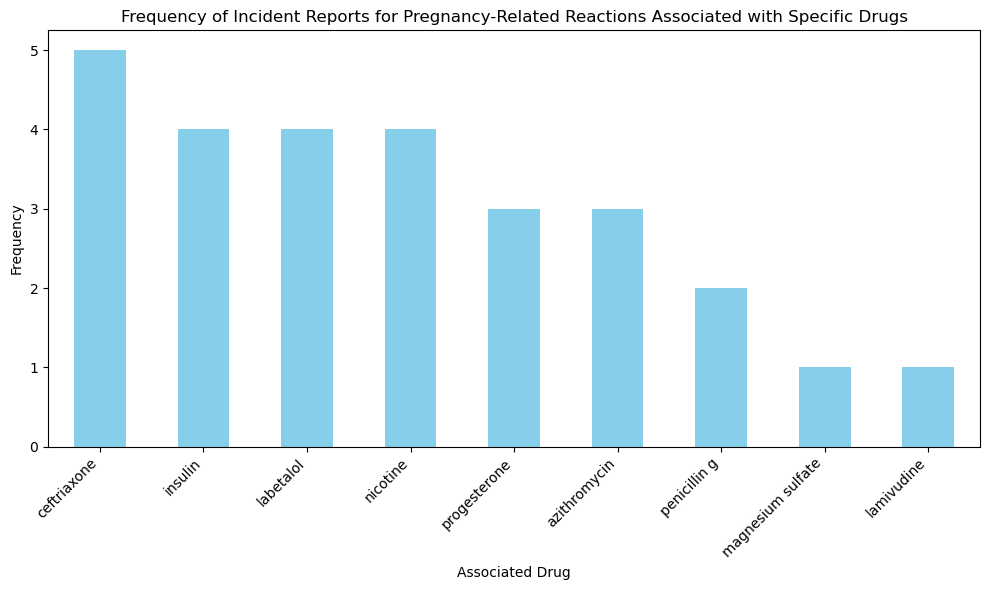

In [324]:
# Count the frequency of each 'target_medicinal_product'
frequency = df_filtered['target_medicinal_product'].value_counts()

# Plotting the data
plt.figure(figsize=(10, 6))
frequency.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.xlabel('Associated Drug')
plt.ylabel('Frequency')
plt.title('Frequency of Incident Reports for Pregnancy-Related Reactions Associated with Specific Drugs')

# Display the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

This bar graph illustrates the frequency of incident reports for pregnancy-related reactions associated with specific drugs in the drug API dataset.

In [153]:
# SQL query to select the required columns: census_region, death_rate, number_one_drug_used, and condition
query = """
SELECT census_region, death_rate, number_one_drug_used, condition
FROM result_table
"""

# Execute the query and load the data into a DataFrame
result_df = pd.read_sql(query, conn)


# Display the result
print(result_df)

                 census_region          death_rate  \
0     census region 2: midwest               10.15   
1       census region 3: south                8.37   
2        census region 4: west                6.89   
3     census region 2: midwest   8.87 (unreliable)   
4       census region 3: south               14.02   
5        census region 4: west                7.93   
6   census region 1: northeast                2.54   
7     census region 2: midwest                4.21   
8       census region 3: south                4.39   
9        census region 4: west                3.36   
10  census region 1: northeast                4.54   
11    census region 2: midwest                6.01   
12      census region 3: south                6.51   
13       census region 4: west                4.74   
14  census region 1: northeast  15.61 (unreliable)   
15    census region 2: midwest               17.15   
16      census region 3: south               13.01   
17       census region 4: we

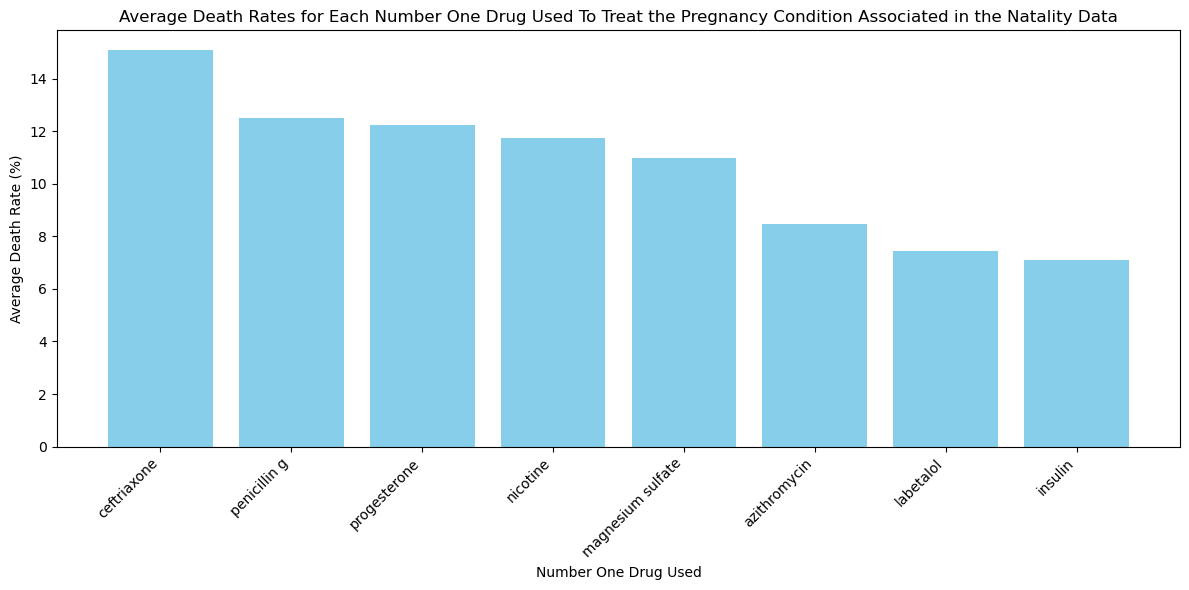

In [353]:
# Convert 'death_rate' to numeric, forcing errors to NaN
result_df['death_rate'] = pd.to_numeric(result_df['death_rate'], errors='coerce')

# Exclude 'Avoid treatment during pregnancy' from the data
result_df = result_df[result_df['number_one_drug_used'] != 'avoid treatment during pregnancy']

# Group by 'number_one_drug_used' and calculate the average death_rate for each drug
avg_death_rate = result_df.groupby('number_one_drug_used')['death_rate'].mean().reset_index()

# Sort the data by death rate for better visualization 
avg_death_rate = avg_death_rate.sort_values('death_rate', ascending=False)

# Plotting the average death rates for each drug
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.bar(avg_death_rate['number_one_drug_used'], avg_death_rate['death_rate'], color='skyblue')
plt.xlabel('Number One Drug Used')
plt.ylabel('Average Death Rate (%)')
plt.title('Average Death Rates for Each Number One Drug Used To Treat the Pregnancy Condition Associated in the Natality Data')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to avoid label cutoff
plt.show()

This data is from a combination of two data tables. Unfortunately, drug names are not present in the natality data, limiting direct insights into the specific medications used during pregnancy.  By examining these factors, we aim to understand how they may correlate with birth outcomes. To provide context, the number one drug used to treat the conditions studied was researched and incorporated into the analysis. However, it is important to note that there is no direct evidence of drug usage during pregnancy within the natality dataset itself. The results correlate with the assumption that the drugs were used to treat the conditions found in the natality data.

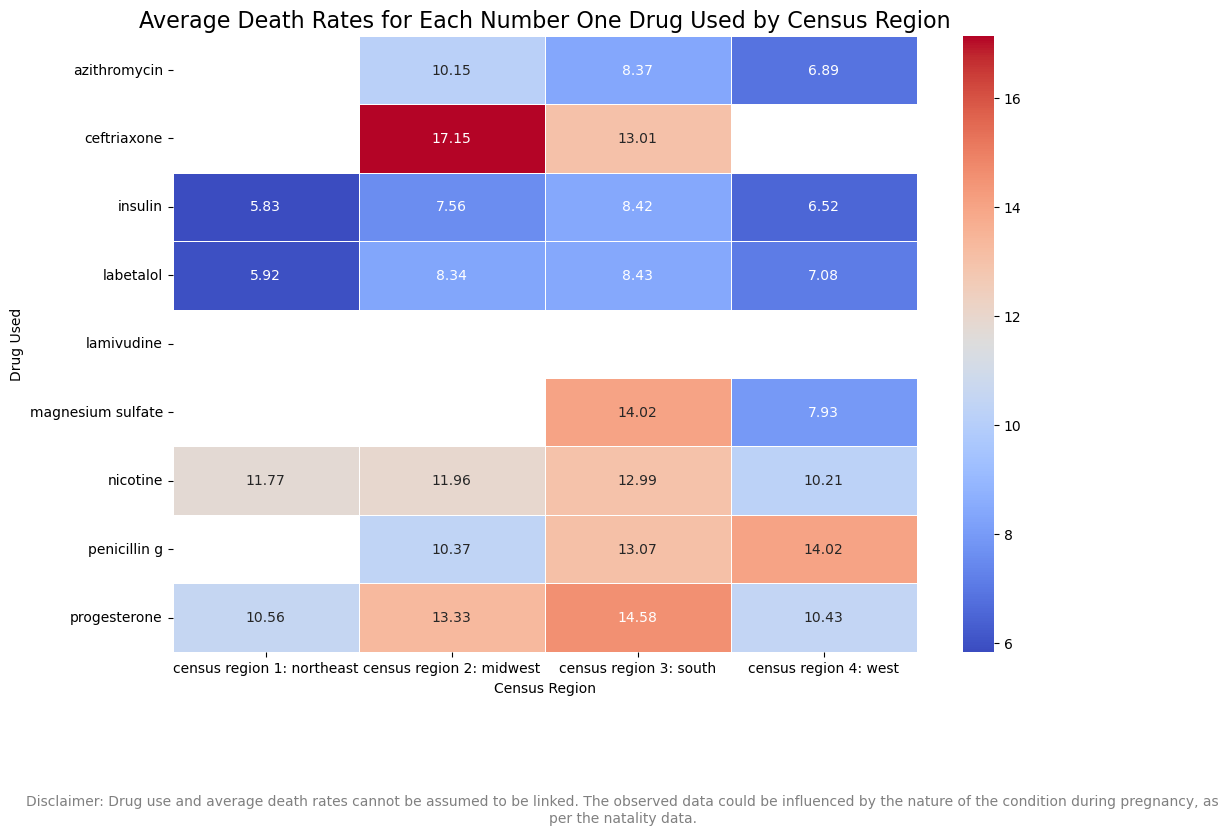

In [355]:
import seaborn as sns

# Exclude 'Avoid treatment during pregnancy' from the data
filtered_df = result_df[result_df['number_one_drug_used'] != 'avoid treatment during pregnancy']

# Group by 'number_one_drug_used' and 'census_region' to calculate average death rate
avg_death_rate_by_region = filtered_df.groupby(['number_one_drug_used', 'census_region'])['death_rate'].mean().reset_index()

# Create a pivot table for easier plotting
pivot_df = avg_death_rate_by_region.pivot(index='number_one_drug_used', columns='census_region', values='death_rate')

# Plotting
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Average Death Rates for Each Number One Drug Used by Census Region', fontsize=16)
plt.ylabel('Drug Used')
plt.xlabel('Census Region')
# Add a disclaimer text at the bottom
plt.figtext(0.5, -0.1, 
            'Disclaimer: Drug use and average death rates cannot be assumed to be linked. The observed data could be influenced by the nature of the condition during pregnancy, as per the natality data.',
            wrap=True, horizontalalignment='center', fontsize=10, color='gray')

plt.show()

Unique values in frequency['target_medicinal_product']:
['ceftriaxone' 'insulin' 'labetalol' 'nicotine' 'progesterone'
 'azithromycin' 'penicillin g' 'magnesium sulfate' 'lamivudine']
Unique values in avg_death_rate['number_one_drug_used']:
['azithromycin' 'ceftriaxone' 'insulin' 'labetalol' 'lamivudine'
 'magnesium sulfate' 'nicotine' 'penicillin g' 'progesterone ']
Checking if 'progesterone' is in both dataframes after normalization:
Progesterone in frequency: True
Progesterone in avg_death_rate: True
Checking if 'progesterone' is in the merged dataframe:
  target_medicinal_product  frequency number_one_drug_used  death_rate
4             progesterone          3         progesterone      12.225


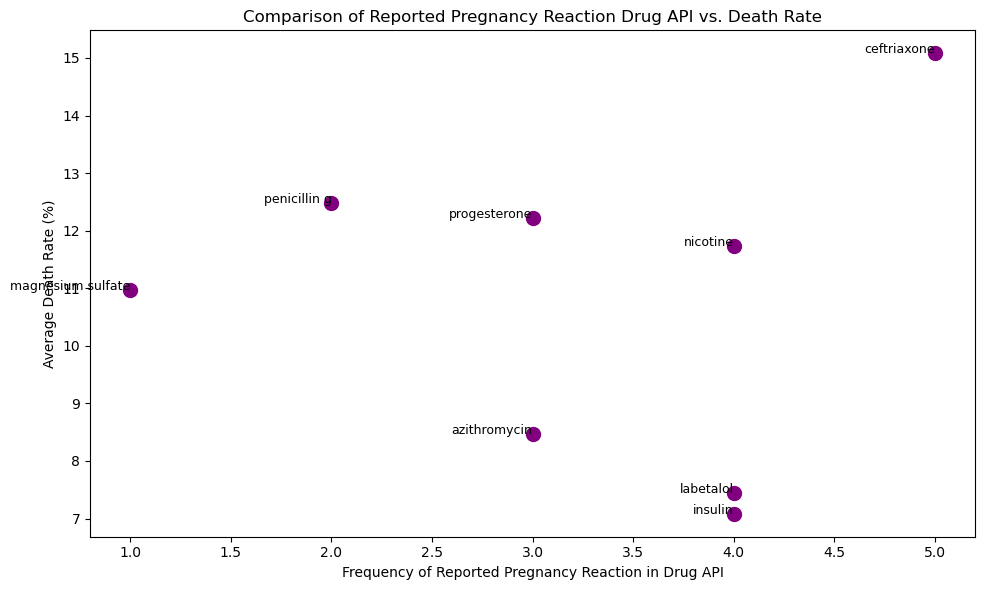

In [316]:
import pandas as pd
import matplotlib.pyplot as plt

# Check the unique values in both 'target_medicinal_product' and 'number_one_drug_used'
print("Unique values in frequency['target_medicinal_product']:")
print(frequency['target_medicinal_product'].unique())

print("Unique values in avg_death_rate['number_one_drug_used']:")
print(avg_death_rate['number_one_drug_used'].unique())

# Normalize both columns
frequency['target_medicinal_product'] = frequency['target_medicinal_product'].str.strip().str.lower()
avg_death_rate['number_one_drug_used'] = avg_death_rate['number_one_drug_used'].str.strip().str.lower()

# Check for the presence of 'progesterone' specifically after normalization
print("Checking if 'progesterone' is in both dataframes after normalization:")
print("Progesterone in frequency:", "progesterone" in frequency['target_medicinal_product'].values)
print("Progesterone in avg_death_rate:", "progesterone" in avg_death_rate['number_one_drug_used'].values)

# Calculate frequency of 'target_medicinal_product'
frequency = df_filtered['target_medicinal_product'].value_counts().reset_index()
frequency.columns = ['target_medicinal_product', 'frequency']

# Calculate mean death rate using group by with 'number_one_drug_used'
avg_death_rate = result_df.groupby('number_one_drug_used')['death_rate'].mean().reset_index()
avg_death_rate.columns = ['number_one_drug_used', 'death_rate']

# Merge frequency data with the death rate data using different column names
merged_df = pd.merge(
    frequency,
    avg_death_rate,
    left_on='target_medicinal_product',
    right_on='number_one_drug_used',
    how='left'
)

# Check if 'progesterone' is in the merged dataframe
print("Checking if 'progesterone' is in the merged dataframe:")
print(merged_df[merged_df['target_medicinal_product'] == 'progesterone'])

# Plotting the comparison (scatter plot of frequency vs death rate)
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['frequency'], merged_df['death_rate'], color='purple', s=100)  # Adjust size 's' as needed
plt.xlabel('Frequency of Reported Pregnancy Reaction in Drug API')
plt.ylabel('Average Death Rate (%)')
plt.title('Comparison of Reported Pregnancy Reaction Drug API vs. Death Rate')

# Annotate each point with the 'target_medicinal_product' name
for i, txt in enumerate(merged_df['target_medicinal_product']):
    plt.annotate(txt, (merged_df['frequency'][i], merged_df['death_rate'][i]), fontsize=9, ha='right')

plt.tight_layout()
plt.show()

Overall, the reported drug reactions during pregnancy in the drug API dataset appear to be relatively low, and do not seem to align with the death rates observed in newborns within the natality data. This suggests that factors beyond the drug itself may contribute to the outcomes.

In [310]:
print(result_df['number_one_drug_used'].unique())

['azithromycin' 'magnesium sulfate' 'insulin' 'labetalol' 'ceftriaxone'
 'lamivudine' 'progesterone ' 'penicillin g' 'nicotine']


In [357]:
# Strip any leading or trailing spaces in the 'number_one_drug_used' column
result_df['number_one_drug_used'] = result_df['number_one_drug_used'].str.strip()

# check if 'progesterone' is normalized correctly
print("Progesterone in result_df:", "progesterone" in result_df['number_one_drug_used'].values)

Progesterone in result_df: True


In [314]:
import pandas as pd

# Adjust display options to show all columns and rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.width', None)     # Adjust width to avoid truncation
pd.set_option('display.max_colwidth', None)  # Ensure no column content is truncated

# Print the entire merged DataFrame
print(merged_df)

  target_medicinal_product  frequency number_one_drug_used  death_rate
0              ceftriaxone          5          ceftriaxone   15.080000
1                  insulin          4              insulin    7.083750
2                labetalol          4            labetalol    7.446250
3                 nicotine          4             nicotine   11.732500
4             progesterone          3                  NaN         NaN
5             azithromycin          3         azithromycin    8.470000
6             penicillin g          2         penicillin g   12.486667
7        magnesium sulfate          1    magnesium sulfate   10.975000
8               lamivudine          1           lamivudine         NaN


In [272]:
# Filter for rows with 'progesterone' in the 'number_one_drug_used' column
progesterone_rows = result_df[result_df['number_one_drug_used'].str.contains('progesterone', na=False, case=False)]

# Display rows for validation
print("Rows in 'result_df' with 'progesterone':")
print(progesterone_rows)

# Calculate the average death rate for 'progesterone'
average_death_rate_progesterone = progesterone_rows['death_rate'].mean()
print(f"\nAverage Death Rate for 'progesterone': {average_death_rate_progesterone:.4f}")

Rows in 'result_df' with 'progesterone':
                 census_region  death_rate number_one_drug_used  \
31  census region 1: northeast       10.56        progesterone    
32    census region 2: midwest       13.33        progesterone    
33      census region 3: south       14.58        progesterone    
34       census region 4: west       10.43        progesterone    

                 condition normalized_drug  
31  previous_preterm_birth    progesterone  
32  previous_preterm_birth    progesterone  
33  previous_preterm_birth    progesterone  
34  previous_preterm_birth    progesterone  

Average Death Rate for 'progesterone': 12.2250


In [261]:
print("Unique target_medicinal_product values:")
print(frequency['target_medicinal_product'].unique())

print("\nUnique number_one_drug_used values:")
print(avg_death_rate['number_one_drug_used'].unique())

Unique target_medicinal_product values:
['ceftriaxone' 'insulin' 'labetalol' 'nicotine' 'progesterone'
 'azithromycin' 'penicillin g' 'magnesium sulfate' 'lamivudine']

Unique number_one_drug_used values:
['azithromycin' 'ceftriaxone' 'insulin' 'labetalol' 'lamivudine'
 'magnesium sulfate' 'nicotine' 'penicillin g' 'progesterone ']


In [225]:
# Query to get column names for 'result_table'
query = "PRAGMA table_info(table3);"
column_info = pd.read_sql_query(query, conn)

# Display the column names and their details
column_info

,cid,name,type,notnull,dflt_value,pk
0,0,report_id,INTEGER,0,None,0
1,1,patient_age,REAL,0,None,0
2,2,patient_sex,REAL,0,None,0
3,3,patient_weight,REAL,0,None,0
4,4,drug_indication,TEXT,0,None,0
5,5,seriousness_congenital_anomaly,REAL,0,None,0
6,6,target_medicinal_product,TEXT,0,None,0
7,7,other_medicinal_product,TEXT,0,None,0
8,8,pregnancy_reaction_event,TEXT,0,None,0
9,9,other_reaction_event,TEXT,0,None,0


In [245]:
# Query data from table3

# Connect to (or create) an SQLite database
conn = sqlite3.connect("pregnancy_database.db")
                       
query = query = "SELECT * FROM table3"
df = pd.read_sql(query, conn)

# List of valid options
valid_options = [
    'azithromycin', 'magnesium sulfate', 'insulin', 'labetalol', 
    'ceftriaxone', 'lamivudine', 'progesterone', 'penicillin g', 'nicotine'
]

# Filter the DataFrame to only include the valid options
df_filtered2 = df[df['target_medicinal_product'].isin(valid_options)]

# Clean the 'target_medicinal_product' values if needed using .loc to avoid the warning
df_filtered2.loc[:, 'target_medicinal_product'] = df_filtered['target_medicinal_product'].replace({
    'insulin glargine': 'insulin',
    'labetalol, labetalol': 'labetalol',
    'magnesium sulfate.': 'magnesium sulfate',
    'progesterone.': 'progesterone',
    'progesterone (solution)': 'progesterone',
    'penicillin g potassium injection': 'penicillin g',
    'penicillin g potassium injection, penicillin g...': 'penicillin g',
    'azithromycin, azithromycin, lamivudine, lamivudine': 'azithromycin',
    'ceftriaxone injection, azithromycin': 'ceftriaxone',
    'lamivudine-hiv': 'lamivudine',
    'lamivudine and zidovudine': 'lamivudine',
    'nicotine (none)': 'nicotine'
})


# write the filtered DataFrame back to a new table in the SQLite database
df_filtered2.to_sql('filtered_table3', conn, if_exists='replace', index=False)

# Display the filtered data
print(df_filtered2)

    report_id  patient_age  patient_sex  patient_weight  \
0    10009044          1.0          1.0            4.00   
1    10016807          NaN          0.0             NaN   
2    10019262          NaN          2.0            2.54   
4    10038823          0.0          2.0            3.60   
5    10017067          NaN          2.0          108.96   
7    10027954         33.0          2.0             NaN   
8    10047438         39.0          2.0             NaN   
9    10051068         28.0          2.0             NaN   
10   10056773          NaN          2.0             NaN   
16   10072649         32.0          2.0             NaN   
17   10144772         42.0          2.0           61.00   
18   10227619         32.0          2.0             NaN   
20   10003326         29.0          2.0             NaN   
21   10003424         30.0          2.0             NaN   
22   10003428          NaN          2.0             NaN   
23   10003429         28.0          2.0             NaN 

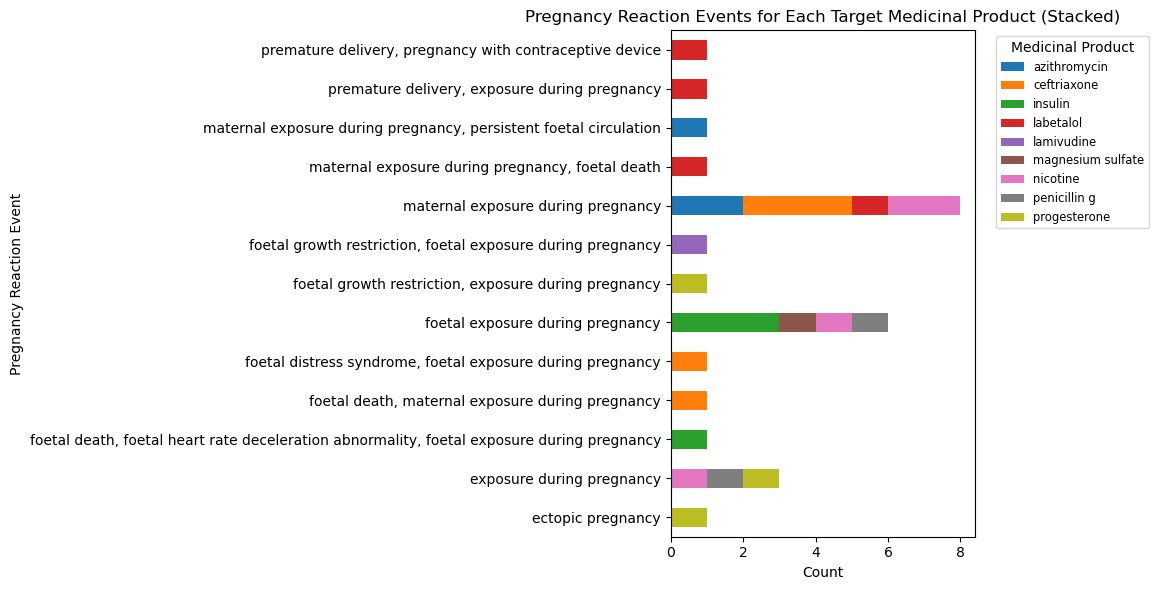

In [304]:
import matplotlib.pyplot as plt
import pandas as pd

# Group by 'target_medicinal_product' and 'pregnancy_reaction_event', count occurrences
reaction_summary = df_filtered.groupby(['target_medicinal_product', 'pregnancy_reaction_event']).size().reset_index(name='count')

# Pivot the data to create a table where each row is a reaction event and each column is a product
pivot_data = reaction_summary.pivot_table(index='pregnancy_reaction_event', columns='target_medicinal_product', values='count', aggfunc='sum', fill_value=0)

# Plot the horizontal stacked bar plot
pivot_data.plot(kind='barh', stacked=True, figsize=(12, 6))

# Rotate the y-axis labels for better readability
plt.yticks(rotation=0)

# Labels and title
plt.xlabel('Count')
plt.ylabel('Pregnancy Reaction Event')
plt.title('Pregnancy Reaction Events for Each Target Medicinal Product (Stacked)')

# Adjust the legend size (smaller)
plt.legend(title='Medicinal Product', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')  # Smaller font size

# Display the plot with tight layout
plt.tight_layout()
plt.show()

In [359]:
# Close connection
conn.close()

# Summary of Findings

This analysis examined the relationship between drug use during pregnancy and maternal and infant health outcomes by combining natality data, drug information from the OpenFDA API, and public data on pregnancy category drugs from Wikipedia. Several ethical considerations were addressed during the data transformation and analysis process. The data underwent significant transformations, particularly the merging of natality data with drug information from the OpenFDA API. This transformation involved inferring drug use based on pregnancy-related conditions, which could introduce biases or inaccuracies, especially in cases where treatments were not directly associated with specific conditions. The assumption that listed treatments were used for the conditions may not always hold true in every case.

The main findings suggest that certain drugs are commonly linked to pregnancy-related conditions, such as insulin for gestational diabetes, labetalol for pre-pregnancy hypertension, and ceftriaxone for gonorrhea, based on the conditions identified in the data. It is important to note that while these drugs are often used to treat these conditions, the analysis does not confirm that they were specifically prescribed to the individuals. The study also noted regional variations in drug use and death rates, with ceftriaxone use more prevalent in the South, and nicotine use being common across all regions but associated with higher mortality in the South. The analysis further indicated that insulin was linked to the lowest death rate, which may reflect its role in managing conditions like gestational diabetes, while ceftriaxone was associated with higher death rates, possibly due to its use in more severe health situations. These observations provide insight into patterns of drug use during pregnancy in relation to maternal conditions, though further research is needed to better understand the complexities of these associations and their potential implications.

The data used in this analysis was publicly available, and no individual-level data was included, reducing privacy concerns. Adherence to privacy laws such as HIPAA (Health Insurance Portability and Accountability Act) was necessary during the data extraction process to protect individuals' privacy and ensure data security. It is important to note the primary risk introduced during data transformation in this analysis.  By inferring drug use from pregnancy conditions, the analysis could lead to potentially misleading correlations, that imply causality between drug use and adverse pregnancy outcomes, which is not supported by the data.  These assumptions in the cleaning and transformation process could greatly affect the accuracy.  

The natality data was sourced from the CDC which is a credible public health organization, and the drug data was sourced from the OpenFDA API.  Both are government databases, with high levels of regulation, which posed as a difficult barrier in the analysis at times.  To mitigate potential ethical risks, proper documentation of assumptions and the data cleaning and transformations were heavily documented.  The analysis requires further research in order to find a mroe reliable cause-and-effect relationship.  